# Data Cleaning

## 1. Operazioni preliminari

> Installazione dipendenze necessarie

In [79]:
!pip install langdetect


[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


> Importazione delle librerie

In [135]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
import numpy as np

> Montaggio di Drive

In [81]:
from google.colab import drive
drive.mount('/content/drive')

> Lettura del dataset

In [82]:
# drive path
csv_path = '/content/drive/MyDrive/Progetto_FDSML/tiktok_accounts.csv'

In [2]:
# local path
csv_path = './datasets/tiktok_accounts.csv'

In [138]:
df = pd.read_csv(csv_path)
df.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake
0,279,0,564,0,0,0,0,0,Tik Toker,False,No bio yet,0,gyzituvigy542,False,True
1,1198,71,9980,0,0,0,0,0,BEULAH,True,NaN,0,tshphjtowl2401583tbww,False,True
2,2968,596,1123,2062,266,0,0,0,Lello27,False,NaN,0,aristanismamojadanuoro,False,False
3,2351,200,818,435,36,0,0,0,clemevitale,False,NaN,0,clemevitale,False,False
4,40300,1100000,52,10000000,720,0,3,1,Saher Monther,False,YouTuber star ⭐️,0,sahermonther,True,False


Divisione attributi:
*   *diggCount*, *followerCount*, *signature*, e *downloadSetting* (Annalaura)
*   *followingCount*, *heartCount*, *videoCount*, *duetSetting* e *stitchSetting* (Raffaele)

## 2. Esplorazione dei dati

In [86]:
len(df)

10043

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10043 entries, 0 to 10042
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   diggCount        10043 non-null  int64 
 1   followerCount    10043 non-null  int64 
 2   followingCount   10043 non-null  int64 
 3   heartCount       10043 non-null  int64 
 4   videoCount       10043 non-null  int64 
 5   commentSetting   10043 non-null  int64 
 6   downloadSetting  10043 non-null  int64 
 7   duetSetting      10043 non-null  int64 
 8   nickname         10043 non-null  object
 9   openFavorite     10043 non-null  bool  
 10  signature        6536 non-null   object
 11  stitchSetting    10043 non-null  int64 
 12  uniqueId         10043 non-null  object
 13  verified         10043 non-null  bool  
 14  fake             10043 non-null  bool  
dtypes: bool(3), int64(9), object(3)
memory usage: 971.1+ KB


In [88]:
df.describe()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,stitchSetting
count,10043.000000,1.004300e+04,10043.000000,1.004300e+04,10043.000000,10043.000000,10043.000000,10043.000000,10043.000000
mean,3893.421189,2.218839e+05,1043.106641,3.978432e+06,66.211889,0.009161,0.146968,0.089316,0.093100
std,17247.832989,2.177557e+06,2186.721075,3.812251e+07,311.690438,0.136519,0.647570,0.479087,0.489071
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,195.000000,2.000000e+00,176.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,358.000000,5.400000e+01,533.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,761.000000,5.120000e+02,686.000000,9.060000e+02,17.000000,0.000000,0.000000,0.000000,0.000000
max,386100.000000,8.230000e+07,10000.000000,1.400000e+09,9300.000000,3.000000,3.000000,3.000000,3.000000


> bins indica il numero totale di intervalli equidistanti in cui suddividere i dati.

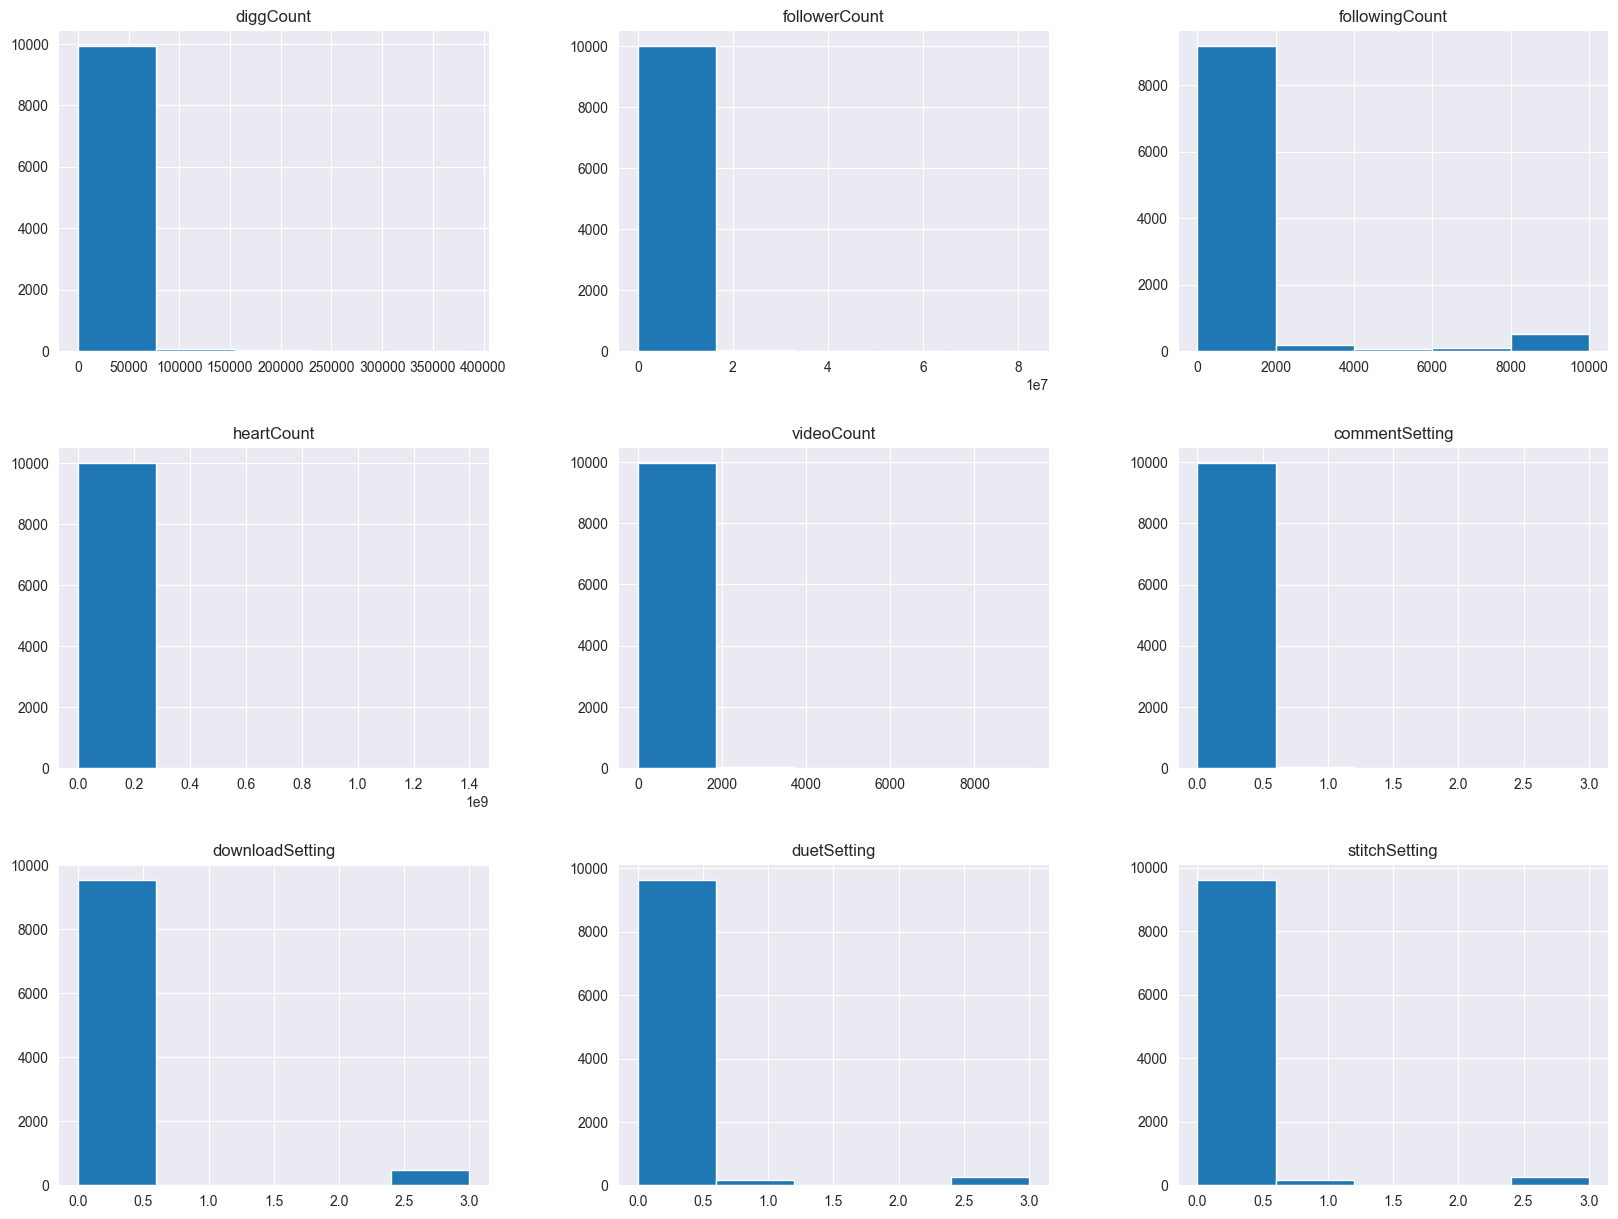

In [11]:
%matplotlib inline
df.hist(bins=5, figsize=(20,15))
plt.show()

In [90]:
# Stampo massimo e minimo di ogni attributo
print("Massimo Digg Count:", df['diggCount'].max())
print("Minimo Digg Count:", df['diggCount'].min())

print("Massimo Follower Count:", df['followerCount'].max())
print("Minimo Follower Count:", df['followerCount'].min())

print("Massimo Following Count:", df['followingCount'].max())
print("Minimo Following Count:", df['followingCount'].min())

print("Massimo Heart Count:", df['heartCount'].max())
print("Minimo Heart Count:", df['heartCount'].min())

print("Massimo Video Count:", df['videoCount'].max())
print("Minimo Video Count:", df['videoCount'].min())

print("Massimo Comment Setting:", df['commentSetting'].max())
print("Minimo Comment Setting:", df['commentSetting'].min())

print("Massimo Download Setting:", df['downloadSetting'].max())
print("Minimo Download Setting:", df['downloadSetting'].min())

print("Massimo Duet Setting:", df['duetSetting'].max())
print("Minimo Duet Setting:", df['duetSetting'].min())

print("Massimo Stitch Setting:", df['stitchSetting'].max())
print("Minimo Stitch Setting:", df['stitchSetting'].min())

Massimo Digg Count: 386100
Minimo Digg Count: 0
Massimo Follower Count: 82300000
Minimo Follower Count: 0
Massimo Following Count: 10000
Minimo Following Count: 0
Massimo Heart Count: 1400000000
Minimo Heart Count: 0
Massimo Video Count: 9300
Minimo Video Count: 0
Massimo Comment Setting: 3
Minimo Comment Setting: 0
Massimo Download Setting: 3
Minimo Download Setting: 0
Massimo Duet Setting: 3
Minimo Duet Setting: 0
Massimo Stitch Setting: 3
Minimo Stitch Setting: 0


> Matrice di correlazione

In [85]:
selected_data = df[['diggCount', 'followerCount', 'followingCount', 'heartCount',
                      'videoCount', 'commentSetting', 'downloadSetting', 'duetSetting', 'stitchSetting', 'fake']]
corr_matrix = selected_data.corr()
corr_matrix['fake'].sort_values(ascending=False)

fake               1.000000
followingCount     0.250169
commentSetting    -0.067205
followerCount     -0.102048
heartCount        -0.104520
duetSetting       -0.186717
stitchSetting     -0.190654
diggCount         -0.204800
videoCount        -0.210097
downloadSetting   -0.227304
Name: fake, dtype: float64

> Creo una copia del dataset originale e mostro la correlazione di una selezione di attributi una per una.

In [143]:
df_copy = df
df_copy['fake'] = np.where(df['fake'] == False, 0, 1)

array([[<Axes: xlabel='followerCount', ylabel='followerCount'>,
        <Axes: xlabel='followingCount', ylabel='followerCount'>,
        <Axes: xlabel='heartCount', ylabel='followerCount'>,
        <Axes: xlabel='videoCount', ylabel='followerCount'>,
        <Axes: xlabel='fake', ylabel='followerCount'>],
       [<Axes: xlabel='followerCount', ylabel='followingCount'>,
        <Axes: xlabel='followingCount', ylabel='followingCount'>,
        <Axes: xlabel='heartCount', ylabel='followingCount'>,
        <Axes: xlabel='videoCount', ylabel='followingCount'>,
        <Axes: xlabel='fake', ylabel='followingCount'>],
       [<Axes: xlabel='followerCount', ylabel='heartCount'>,
        <Axes: xlabel='followingCount', ylabel='heartCount'>,
        <Axes: xlabel='heartCount', ylabel='heartCount'>,
        <Axes: xlabel='videoCount', ylabel='heartCount'>,
        <Axes: xlabel='fake', ylabel='heartCount'>],
       [<Axes: xlabel='followerCount', ylabel='videoCount'>,
        <Axes: xlabel='follo

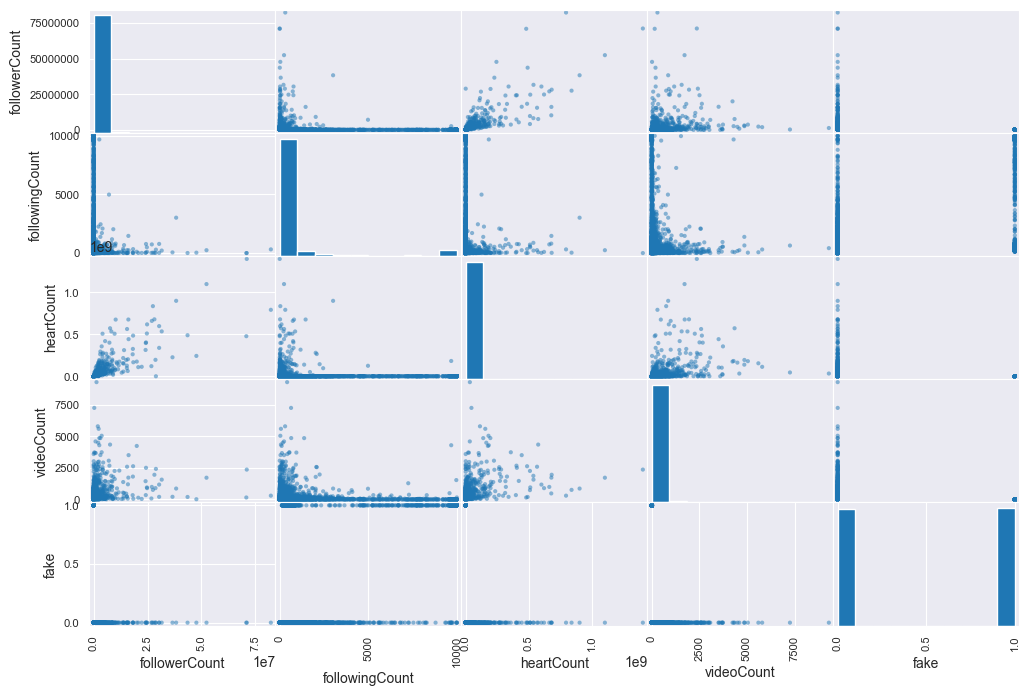

In [144]:
attributes = ['followerCount', 'followingCount', 'heartCount', 'videoCount', 'fake']
scatter_matrix(df_copy[attributes], figsize=(12, 8))

## 3. Pulizia dei dati

> creo una copia del dataset originale

In [145]:
df_copy = df

### 3.1 Pulizia *diggCount*

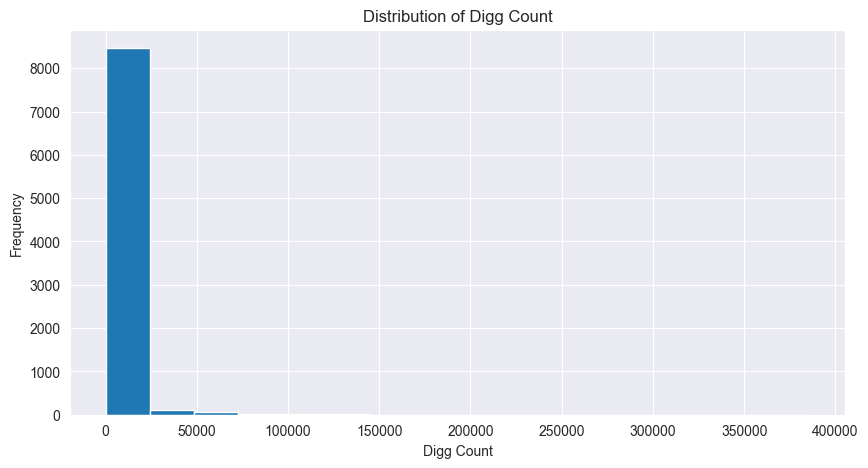

In [98]:
df_copy['diggCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('Digg Count')
plt.ylabel('Frequency')
plt.title('Distribution of Digg Count')
plt.show()

In [117]:
df_copy['diggCount'].describe()

count     10043.000000
mean       3893.421189
std       17247.832989
min           0.000000
25%         195.000000
50%         358.000000
75%         761.000000
max      386100.000000
Name: diggCount, dtype: float64

#### Standardizzazione con StandardScaler

In [100]:
scaler = StandardScaler()
data = df_copy[['diggCount', 'followerCount', 'followingCount', 'heartCount', 'videoCount']]
data_scaled = scaler.fit_transform(data)
df_standardized = pd.DataFrame(data_scaled, columns=data.columns)
df_standardized.head()

,diggCount,followerCount,followingCount,heartCount,videoCount
0,-0.189107,-0.087310,-0.243091,-0.089624,-0.199989
1,-0.123425,-0.087275,3.856349,-0.089624,-0.199989
2,0.003078,-0.087018,0.000280,-0.089560,1.082286
3,-0.041019,-0.087212,-0.132507,-0.089610,-0.026448
4,-0.185176,-0.087310,-0.225677,-0.089624,-0.199989


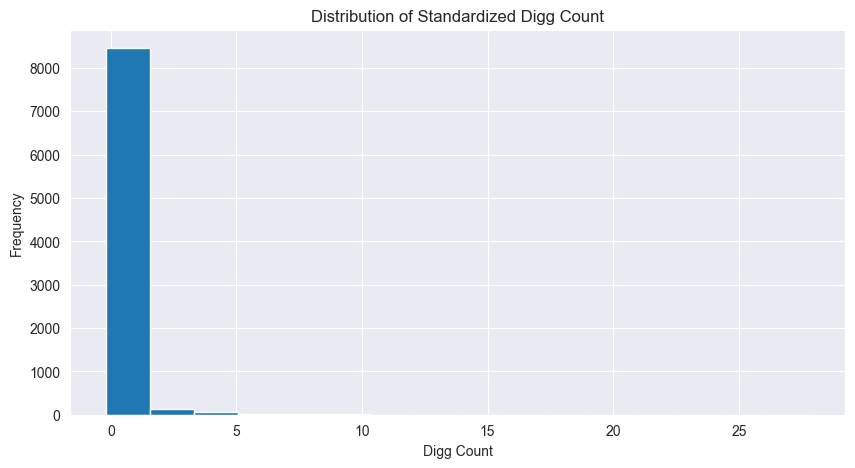

In [73]:
df_standardized['diggCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('Digg Count')
plt.ylabel('Frequency')
plt.title('Distribution of Standardized Digg Count')
plt.show()

#### Quantile Transformation

In [146]:
qt = QuantileTransformer(output_distribution='uniform')
df_copy['diggCount'] = qt.fit_transform(df_copy[['diggCount']])

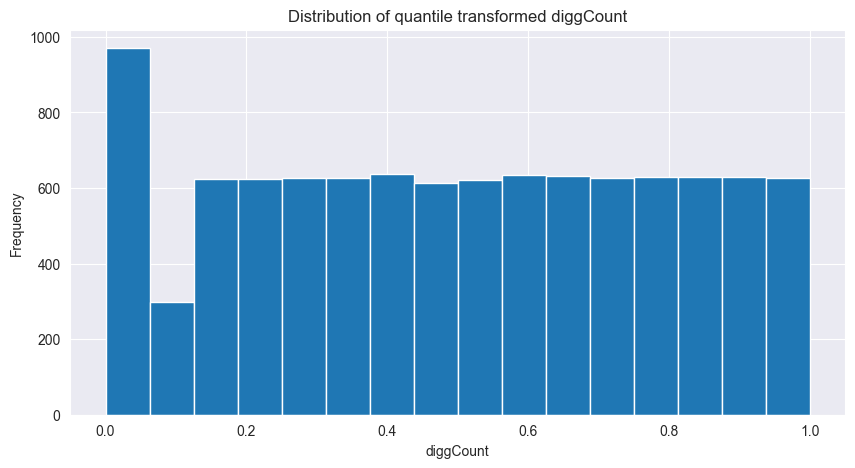

In [147]:
df_copy['diggCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('diggCount')
plt.ylabel('Frequency')
plt.title('Distribution of quantile transformed diggCount')
plt.show()

In [119]:
df_copy['diggCount'].describe()

count    10043.000000
mean         0.495660
std          0.296114
min          0.000000
25%          0.250499
50%          0.500501
75%          0.750090
max          1.000000
Name: diggCount, dtype: float64

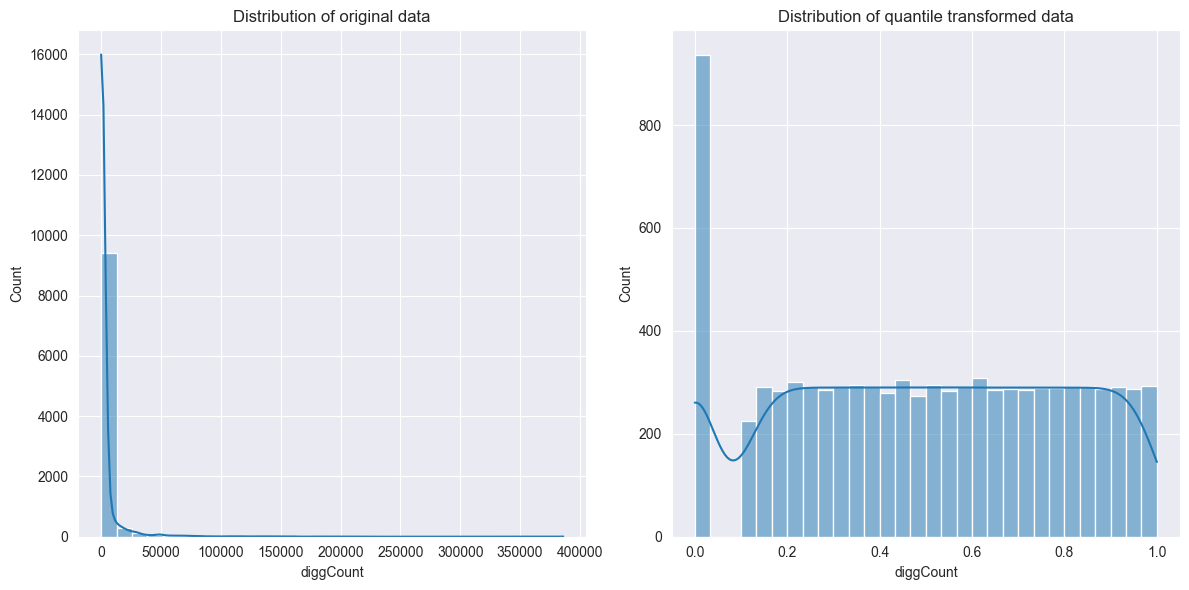

In [78]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['diggCount'], bins=30, kde=True)
plt.title('Distribution of original data')

plt.subplot(1, 2, 2)
sns.histplot(df_copy['diggCount'], bins=30, kde=True)
plt.title('Distribution of quantile transformed data')

plt.tight_layout()
plt.show()

In [79]:
df_copy.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake
0,0.312813,0,564,0,0,0,0,0,Tik Toker,False,,0,gyzituvigy542,False,True
1,0.826862,71,9980,0,0,0,0,0,BEULAH,True,,0,tshphjtowl2401583tbww,False,True
2,0.885906,596,1123,2062,266,0,0,0,Lello27,False,,0,aristanismamojadanuoro,False,False
3,0.872792,200,818,435,36,0,0,0,clemevitale,False,,0,clemevitale,False,False
4,0.451451,0,604,0,0,0,0,0,Tik Toker,False,,0,exidyvetoqygyv,False,True


#### Min-Max Scaler

In [87]:
scaler = MinMaxScaler()
df_copy['diggCount'] = scaler.fit_transform(df_copy[['diggCount']])

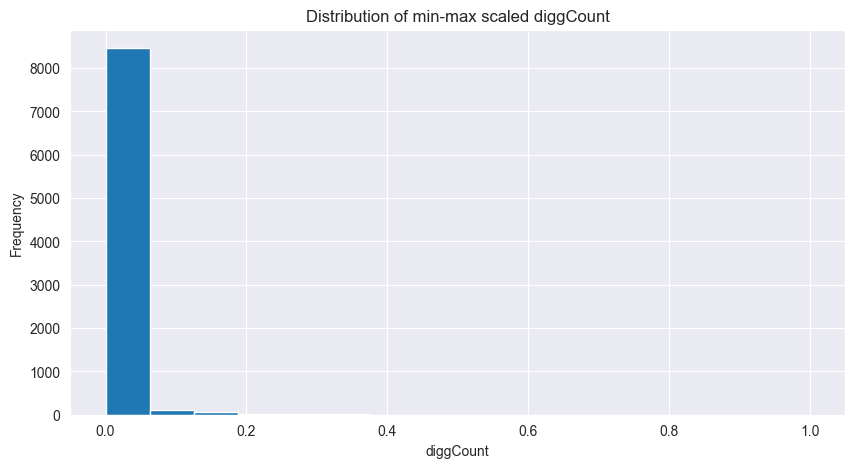

In [88]:
df_copy['diggCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('diggCount')
plt.ylabel('Frequency')
plt.title('Distribution of min-max scaled diggCount')
plt.show()

In [89]:
df_copy['diggCount'].describe()

count    8702.000000
mean        0.007542
std         0.036191
min         0.000000
25%         0.000554
50%         0.000907
75%         0.001336
max         1.000000
Name: diggCount, dtype: float64

In [91]:
df_copy.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake
0,0.000723,0,564,0,0,0,0,0,Tik Toker,False,,0,gyzituvigy542,False,True
1,0.003103,71,9980,0,0,0,0,0,BEULAH,True,,0,tshphjtowl2401583tbww,False,True
2,0.007687,596,1123,2062,266,0,0,0,Lello27,False,,0,aristanismamojadanuoro,False,False
3,0.006089,200,818,435,36,0,0,0,clemevitale,False,,0,clemevitale,False,False
4,0.000865,0,604,0,0,0,0,0,Tik Toker,False,,0,exidyvetoqygyv,False,True


### 3.2 Pulizia *signature*

> Sostituisce le signature con valore NaN con la stringa vuota.
> Sostitusce le signature con valore 'No bio yet' con la stringa vuota.

In [148]:
df_copy['signature'] = df_copy['signature'].fillna('')
df_copy['signature'] = df_copy['signature'].replace('No bio yet', '')

In [95]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10043 entries, 0 to 10042
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   diggCount        10043 non-null  int64 
 1   followerCount    10043 non-null  int64 
 2   followingCount   10043 non-null  int64 
 3   heartCount       10043 non-null  int64 
 4   videoCount       10043 non-null  int64 
 5   commentSetting   10043 non-null  int64 
 6   downloadSetting  10043 non-null  int64 
 7   duetSetting      10043 non-null  int64 
 8   nickname         10043 non-null  object
 9   openFavorite     10043 non-null  bool  
 10  signature        10043 non-null  object
 11  stitchSetting    10043 non-null  int64 
 12  uniqueId         10043 non-null  object
 13  verified         10043 non-null  bool  
 14  fake             10043 non-null  bool  
dtypes: bool(3), int64(9), object(3)
memory usage: 971.1+ KB


> Conta ed elimina le istanze con signature non in inglese.

In [150]:
indices_to_remove = []

for i, signature in enumerate(df_copy['signature']):
  if signature == '':
    continue
  try:
    language = detect(signature)
  except Exception as e:
    continue
  if language != 'en':
    indices_to_remove.append(i)

count = len(indices_to_remove)
df_copy = df_copy.drop(index=indices_to_remove).reset_index(drop=True)
print(count)

1342
22


In [151]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8679 entries, 0 to 8678
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diggCount        8679 non-null   float64
 1   followerCount    8679 non-null   int64  
 2   followingCount   8679 non-null   int64  
 3   heartCount       8679 non-null   int64  
 4   videoCount       8679 non-null   int64  
 5   commentSetting   8679 non-null   int64  
 6   downloadSetting  8679 non-null   int64  
 7   duetSetting      8679 non-null   int64  
 8   nickname         8679 non-null   object 
 9   openFavorite     8679 non-null   bool   
 10  signature        8679 non-null   object 
 11  stitchSetting    8679 non-null   int64  
 12  uniqueId         8679 non-null   object 
 13  verified         8679 non-null   bool   
 14  fake             8679 non-null   int64  
dtypes: bool(2), float64(1), int64(9), object(3)
memory usage: 898.5+ KB


In [104]:
df_copy.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake
0,0.312813,0,564,0,0,0,0,0,Tik Toker,False,,0,gyzituvigy542,False,True
1,0.826181,71,9980,0,0,0,0,0,BEULAH,True,,0,tshphjtowl2401583tbww,False,True
2,0.885741,596,1123,2062,266,0,0,0,Lello27,False,,0,aristanismamojadanuoro,False,False
3,0.872666,200,818,435,36,0,0,0,clemevitale,False,,0,clemevitale,False,False
4,0.451451,0,604,0,0,0,0,0,Tik Toker,False,,0,exidyvetoqygyv,False,True


### 3.3 Pulizia *followerCount*

### 3.4 Pulizia *downloadSetting*

### 3.5 Pulizia *followingCount*

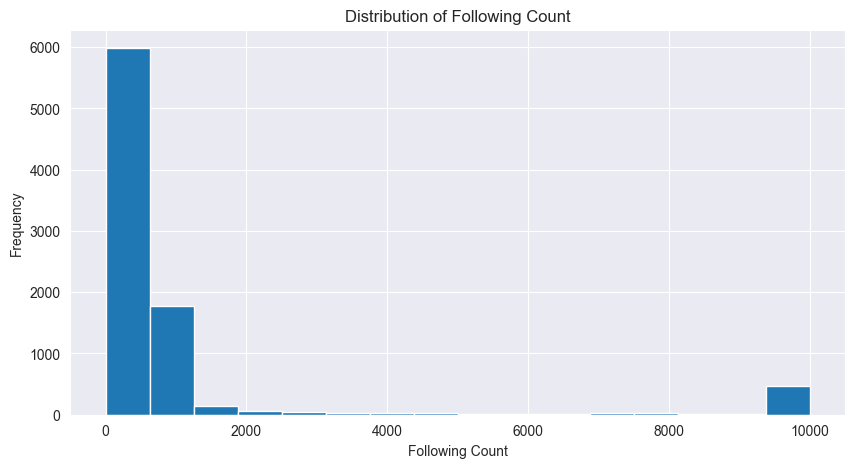

In [152]:
df_copy['followingCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('Following Count')
plt.ylabel('Frequency')
plt.title('Distribution of Following Count')
plt.show()

In [153]:
df_copy['followingCount'].describe()

count     8679.000000
mean      1124.284941
std       2299.636292
min          0.000000
25%        249.000000
50%        540.000000
75%        692.000000
max      10000.000000
Name: followingCount, dtype: float64

#### Quantile Trasformation

In [154]:
qt = QuantileTransformer(output_distribution='uniform')
df_copy['followingCount'] = qt.fit_transform(df_copy[['followingCount']])

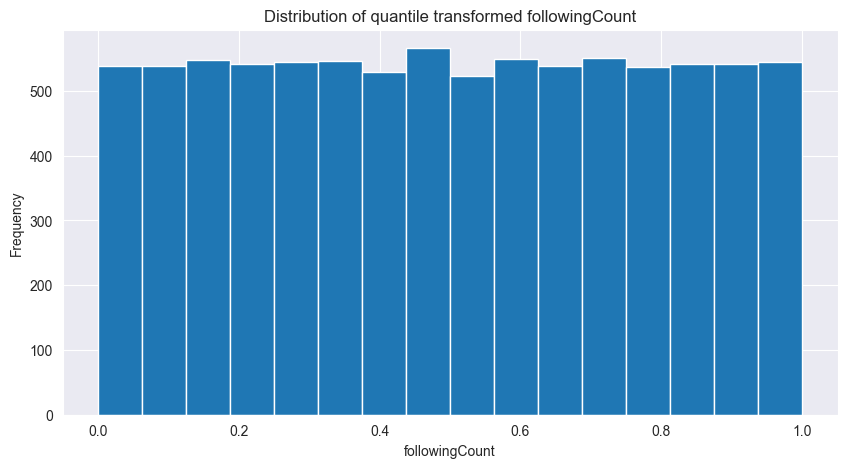

In [155]:
df_copy['followingCount'].hist(bins=16, figsize=(10, 5))
plt.xlabel('followingCount')
plt.ylabel('Frequency')
plt.title('Distribution of quantile transformed followingCount')
plt.show()

In [156]:
df_copy["followingCount"].describe()

count    8679.000000
mean        0.499838
std         0.289001
min         0.000000
25%         0.250751
50%         0.498498
75%         0.749750
max         1.000000
Name: followingCount, dtype: float64

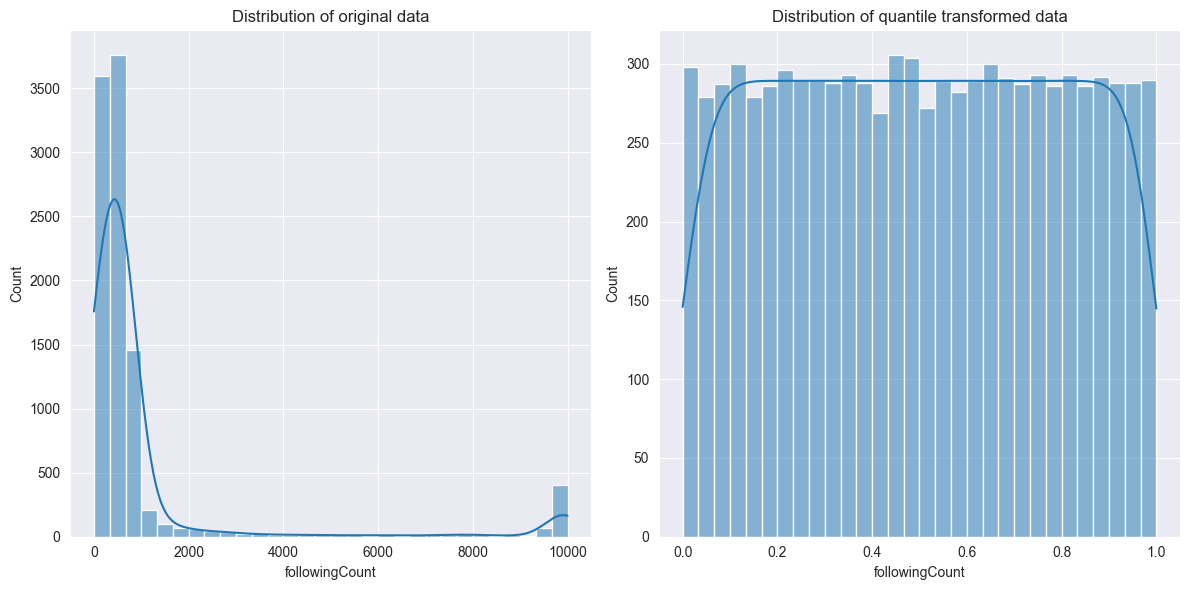

In [157]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['followingCount'], bins=30, kde=True)
plt.title('Distribution of original data')

plt.subplot(1, 2, 2)
sns.histplot(df_copy['followingCount'], bins=30, kde=True)
plt.title('Distribution of quantile transformed data')

plt.tight_layout()
plt.show()

In [158]:
df_copy.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake
0,0.313313,0,0.608108,0,0,0,0,0,Tik Toker,False,,0,gyzituvigy542,False,1
1,0.786779,71,0.986486,0,0,0,0,0,BEULAH,True,,0,tshphjtowl2401583tbww,False,1
2,0.855153,596,0.885652,2062,266,0,0,0,Lello27,False,,0,aristanismamojadanuoro,False,0
3,0.838839,200,0.858097,435,36,0,0,0,clemevitale,False,,0,clemevitale,False,0
4,0.436937,0,0.670671,0,0,0,0,0,Tik Toker,False,,0,exidyvetoqygyv,False,1


### 3.6 Pulizia *heartCount*

### 3.7 Pulizia *videoCount*

### 3.8 Pulizia *duetSetting*

### 3.9 Pulizia *stitchSetting*

## 4. Rimozione feature

## 5. Salvataggio dataset pulito